# Horizon Chart with Altair

## Imports

In [1]:
from horizonChart.horizonChart import HorizonChartGenerator as hcg
from altairThemes.standardTheme import standardTheme

In [2]:
import pandas as pd
import altair as alt
import numpy as np

In [3]:
alt.themes.register("standardTheme", standardTheme)
alt.themes.enable("standardTheme")

ThemeRegistry.enable('standardTheme')

## Data

In [4]:
dateRange = range(1,100)
values = np.random.uniform(low=10, high=-20, size=len(dateRange))
data = pd.DataFrame(
    {
        'x': dateRange,
        'y': values
    })

In [13]:
df = pd.read_csv('./data/DAX_MAX.csv').loc[:,['Date','Close']]
df.Date = pd.to_datetime(df.Date)

df = df.loc[df.Date > '2012-01-01',:]

df['previous'] = df.loc[:,'Close'].shift(1)
df['pct_change'] = df.apply((lambda x: (x.Close-x.previous)*100/x.previous), axis=1)
df['idx_change'] = df.apply((lambda x: (x.Close-6075.520020)/6075.520020), axis=1)
df['year'] = df.Date.apply(lambda x: x.year)
df['month_date'] = df.Date.apply(lambda x: x.strftime('%m-%d'))
df.head()

,Date,Close,previous,pct_change,idx_change,year,month_date
1787,2012-01-02,6075.520020,NaN,NaN,0.000000,2012,01-02
1788,2012-01-03,6166.569824,6075.520020,1.498634,0.014986,2012,01-03
1789,2012-01-04,6111.549805,6166.569824,-0.892231,0.005930,2012,01-04
1790,2012-01-05,6095.990234,6111.549805,-0.254593,0.003369,2012,01-05
1791,2012-01-06,6057.919922,6095.990234,-0.624514,-0.002897,2012,01-06


## Sample plot

In [14]:
r = hcg(data=df, X='month_date', Y='idx_change', noLevels=3).generate()

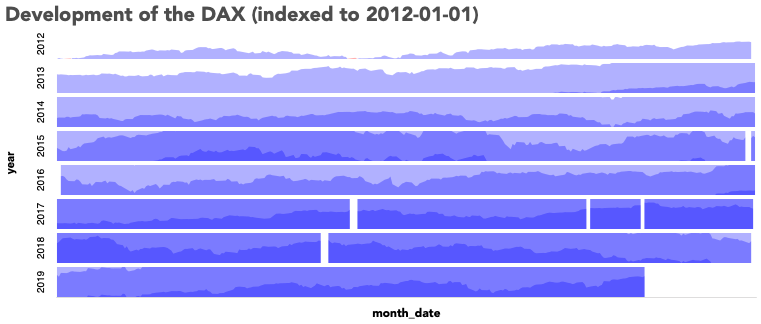

In [16]:
r.properties(
    width=700,
    height=30
).facet(
    row='year'
).properties(
    title='Development of the DAX (indexed to 2012-01-01)'
).configure_facet(
    spacing=4
)